# MTM224 - Prova 3 - Interpolação e Mínimos quadrados
## Métodos Numéricos Computacionais
### UFSM - 2º Semestre de 2024


**Nome:**

**1.** A função de Runge é escrita como
O volume específico de um vapor superaquecido está listado nas tabelas de vapor para diversas temperaturas. por exemplo, na pressão absoluta de 3000 lb/pol$^2$:
$$
	\begin{array}{cccccc}
			\hline
			T, ^\circ F &700 &720 &740 &760 &780 \\ \hline
			v, pés^3/lb_m &0,0977 &0,12184 &0,14060 &0,15509 &0,16643  \\
			\hline
		\end{array}
$$	
Determine $v$ para $T = 750 ^\circ F$ usando interpolação, use a fórmula de Lagrange e a fórmula de Newton e compare o resultado. Comente o que você observou.$$

dd [ 9.77000000e-02  1.20700000e-03 -6.72500000e-06  2.31250000e-08
  2.60416667e-12]
P(750)= 0.148308984375


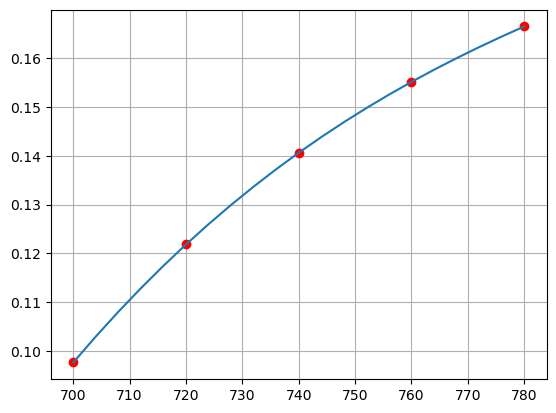

In [45]:
yi = np.array([0.0977, 0.12184, 0.14060, 0.15509, 0.16643]) 
xi = np.array([700, 720, 740, 760, 780])


def evalPoly(dd,xi,x):
    n = len(xi) - 1
    # Degree of polynomial
    p = dd[n]
    for k in range(1,n+1):
        p = dd[n-k] + (x -xi[n-k])*p
    return p

def coeffts(xi,yi):
    m = len(xi)
    # Number of data points
    dd = yi.copy()

    for k in range(1,m):
        dd[k:m] = (dd[k:m] - dd[k-1])/(xi[k:m] - xi[k-1])
    return dd


dd = coeffts(xi,yi)
print ('dd',dd)

print("P(750)=",evalPoly(dd,xi,750))

Xplot = np.linspace(xi[0], xi[-1], 21)
Yplot = []

for x in Xplot:
    Yplot.append(evalPoly(dd,xi,x))

plt.plot(xi, yi, "ro", Xplot, Yplot, "-")
plt.grid()
plt.show()

**2.** Seja $f(x)=2e^x+3$, aproxime $f(0.35)$ utilizando um polinômio interpolador de grau 4 no intervalo de $x_0=0$ e $x_4=0.5$. Dê um limitante superior para o erro e compare com o erro absoluto.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Definindo a lista de pontos a serem interpolados
X  = [0., 0.5]

# Definindo a função a ser interpolada
f = lambda x: 2*np.exp(x)+3

# Calculando os valores de f(xi)
Y = f(X)

print (np.around(X,4))
print (np.around(Y,4))

# Criando uma lista de listas para a tabela de diferencas divididas 
dd=[Y] #ordem 0

# Gerando a tabela de dif. div. a partir da ordem 1 em diante
for o in range(1, len(X)):
    dd.append([])   # Adiciona uma lista vazia para armazenar as dds de ordem 1
    for k in range(0, len(X)-o, 1): 
        valor = (dd[o-1][k+1]-dd[o-1][k])/(X[k+o]-X[k])    
        dd[o].append(valor)
    print (np.around(dd[o],4))

def produtorio(x,n):
    prod = 1.
    for i in range(n):
        prod = prod * (x-X[i])
    return prod

def calculaP(x):
    soma = dd[0][0]
    for i in range(1,len(X)):
        soma = soma + produtorio(x,i)*dd[i][0]
    return soma

print ("P(0.35) =", calculaP(0.35))
 
# Cria a lista de pontos e calcula os valores para p plot
Xp = np.linspace(X[0], X[-1], num=10) 
Yp = []
for x in Xp:
    y = calculaP(x)
    Yp.append(y)

    
plt.plot(X, Y, 'ro', Xp, Yp,'-', )
plt.grid()
plt.show()

[0.  0.5]
[5.     6.2974]
[2.5949]
P(0.35) = 5.908209778980179


**3.** A função de Runge é escrita como

$$
f(x)=\frac{1}{1+25 x^2}
$$

a) Faça o gráfico dessa função para o intervalo de $x=-1$ a $1$. 

b) Obtenha o polinômio interpolador utilizando $5$ pontos igualmente espaçados e trace o gráfico. Use este polinômio para obter uma estimativa para $f(0.8)$. 

c) Use um polinômio de grau menor  para estimar $f(0,8) calcule o erro nas duas estimativas. Comente. 

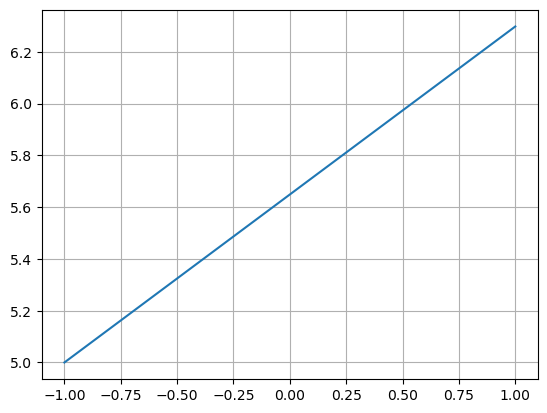

In [27]:
#A

import matplotlib.pyplot as plt
import numpy as np

# Definindo a lista de pontos a serem interpolados
X  = [-1., 1]
# Definindo a função a ser interpolada
f = lambda x: np.divide(1,1+ 25*(x**2))


plt.plot(X, Y, '-')
plt.grid()
plt.show()

[0.03846154 0.        ]
P(0.8) = 0.038461538461538464


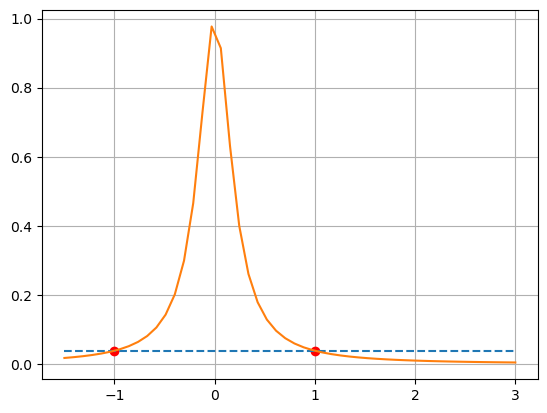

In [44]:
xi = np.array([-1., 1.0])
func = lambda x: np.divide(1,1+ 25*(x**2))
yi = func(xi)

f = difdiv(xi,yi)
print (f)

def calculaP(f,xi,x):
    n = len(xi) - 1
    p = f[n]
    for i in range(1,n+1):
        p = f[n-i] + (x -xi[n-i])*p
    return p

print ("P(0.8) =", calculaP(f,xi,0.8))

xp = np.linspace(-1.5, 3)
yp = []

for x in xp:
    yp.append(calculaP(f,xi,x))

plt.plot(xi, yi, "ro", 
         xp, yp, "--",
         xp, func(xp),"-")
plt.grid()
plt.show()

**4.** Dados os seguintes pontos tabelados 

$$
\begin{array}{cccccccccc}
\hline
x_i    &0.01  &0.99  &2.02  &3.01  &3.97  &5.01  &5.93  &6.99  &8.08  \\
\hline
f(x_i) &0.000 &1.621  &1.782  &0.915 &-0.122 &-0.225 &1.099 &2.728 &3.534\\
\hline
\end{array}
$$

(a) Encontre o polinômio de 3 que melhor se ajusta aos pontos dados usando mínimos quadrados.

(b) Agora encontre a função do tipo $g(x)=a_1x + a_2 sen(x)$ que melhor se ajusta. 

(c) Decida qual das duas funções acima é a melhor escola para estimar $f(11.5)$. Jusfifique sua resposta.

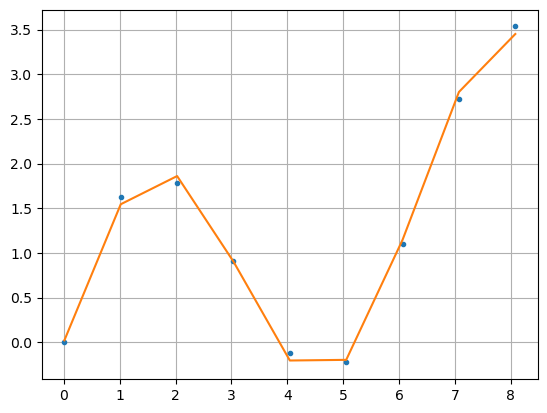

In [36]:
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

x = np.linspace(0.01,8.08, 9)
y = np.array([ 0.000, 1.621, 1.782, 0.915, -0.122, -0.225, 1.099, 2.728, 3.534])


g1 = lambda x: np.ones(len(x))
g2 = lambda x: (x)
g3 = lambda x: np.sin(x)

V = np.array([g1(x), g2(x), g3(x)])

A = V.dot(V.T)
B = np.dot(V,y)
a = np.linalg.solve(A,B)

g = lambda x: a[0]*g1(x)+a[1]*g2(x)+a[2]*g3(x)


# Plota os pontos e a função g(x)
xp = np.linspace(0.01, 8.08, 9)

plt.plot(x, y, ".")
plt.plot(xp, g(xp), "-") 
plt.grid()
plt.show()

#acredito que a função dada é melhor, visto que os pontos parecem ficar mais diretos com a linha criada.

**5.** O número de bactérias, por unidade de volume, existente em uma cultura após $x$ horas é apresentado na tabela:

$$
	\begin{array}{llllllll}
			\hline
			\text{nº de horas} &0 &1 &2 &3 &4 &5 &6 \\ \hline
			\text{nº de bactéricas} &32 &47 &65 &92 &132 &190 &275  \\ \hline
			\hline
		\end{array}
$$	

Ajuste os dados às curvas $y=ab^x$ e $y=ax^b$ e compare graficamente os valores obtidos por meio dessas equações com os dados experimentais. Obtenha uma estimativa para o valor de $y(x)$ em $x=7$.


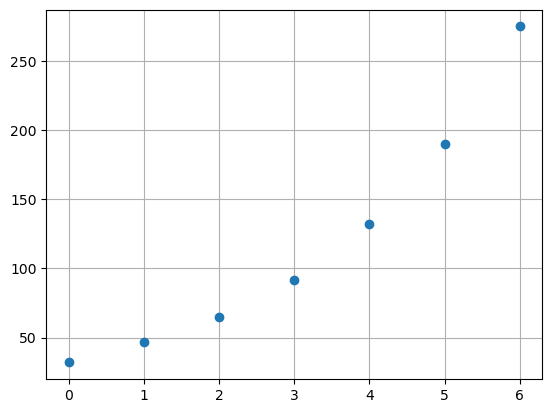

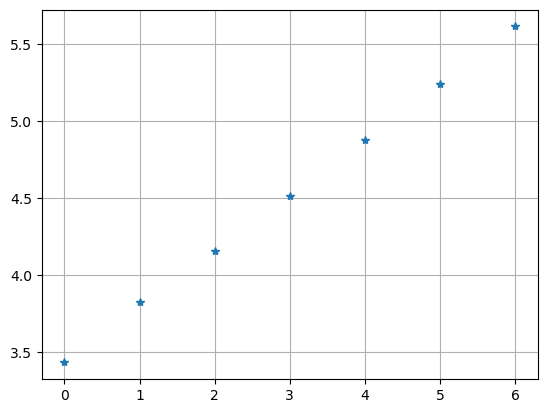

A= [[ 7 21]
 [21 91]]
b= [ 31.66244364 105.06727909]
SOL= [3.44321179 0.35999815]
31.287285016172966 0.35999814938183344


In [46]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

from sympy import *
init_printing(use_unicode=True)

xi = np.array([ 0, 1, 2, 3, 4, 5, 6])
yi = np.array([ 32, 47, 65, 92, 132, 190, 275])
# plotando
plt.plot(X, Y, "o")
plt.grid()
plt.show()

yl=np.log(yi-1)
plt.plot(xi, yl, "*")
plt.grid()
plt.show()

A = np.array([[len(xi), np.sum(xi)],
              [np.sum(xi), np.sum(xi*xi)]])
b = np.array([np.sum(yl), np.sum(yl*xi)])

a = np.linalg.solve(A, b)
print ("A=",A)
print ("b=",b)
print ("SOL=",a)

K = np.exp(a[0])
B = a[1]
print(K,B)

g = lambda x: 1+K*np.exp(B*x)

xp = np.linspace(xi[0],xi[-1],51)
plt.plot(xi, yi, "o", xp, g(xp))
plt.grid()
plt.show()